# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page [summary](https://docs.google.com/presentation/d/1bdJE_ErhrTySCiGTgpAS-TD9Rs-j_FWYg51PX_DPkYg/edit?usp=sharing&resourcekey=0-ghqcaAkRFeS23YosCCquGA) of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


PACE stages



*   [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
*   [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

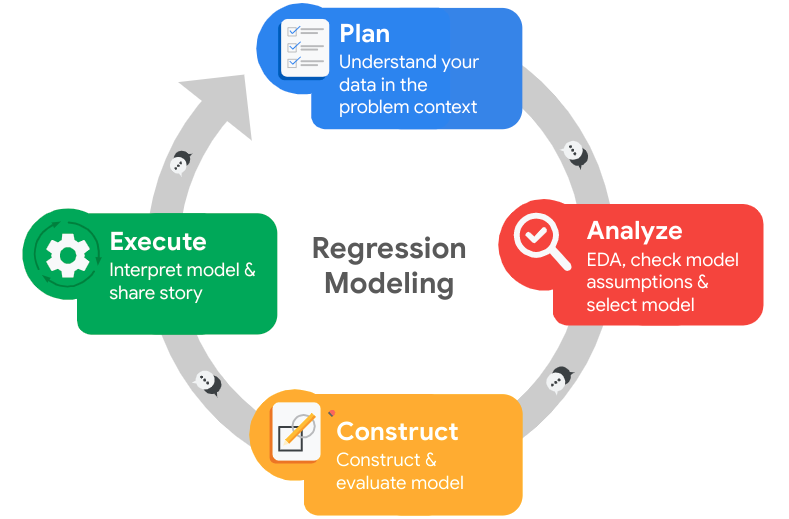



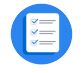

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load dataset

The dataset is located in the same folder as this notebook (i.e., in the current working directory on Coursera), and is called **`HR_capstone_dataset.csv`.** You can read in this data directly from Coursera without having to download it.

In [3]:
# Load dataset into a dataframe
### YOUR CODE HERE ###
df = pd.read_csv('HR_capstone_dataset.csv') #HR_comma_sep.csv is a different version of the same data; HR_captsone_dataset.csv was not downloadable from Coursera

# Display first few rows of the dataframe
### YOUR CODE HERE ###
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [7]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [8]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [9]:
# Display all column names
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [11]:
# Rename columns as needed
### YOUR CODE HERE ###
df.columns = ['satisfaction','last_eval','projects','monthly_hours','tenure','workplace_injury','left_company','promo_in_l5years','dept','salary']

# Display all column names after the update
### YOUR CODE HERE ###
df.columns

Index(['satisfaction', 'last_eval', 'projects', 'monthly_hours', 'tenure',
       'workplace_injury', 'left_company', 'promo_in_l5years', 'dept',
       'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [12]:
# Check for missing values
### YOUR CODE HERE ###
df.isna().sum()

satisfaction        0
last_eval           0
projects            0
monthly_hours       0
tenure              0
workplace_injury    0
left_company        0
promo_in_l5years    0
dept                0
salary              0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [25]:
# Check for duplicates
### YOUR CODE HERE ###
df.duplicated(df.columns)

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [26]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df[df.duplicated(df.columns)]

,satisfaction,last_eval,projects,monthly_hours,tenure,workplace_injury,left_company,promo_in_l5years,dept,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [27]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df_nodupes = df.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df_nodupes.head()

,satisfaction,last_eval,projects,monthly_hours,tenure,workplace_injury,left_company,promo_in_l5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [28]:
df_nodupes.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

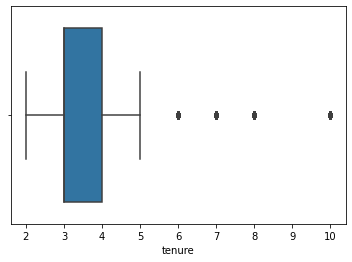

In [29]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(data=df_nodupes, x='tenure')


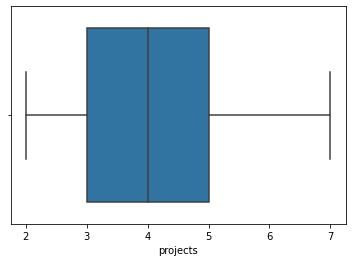

In [63]:
sns.boxplot(data=df_nodupes, x='projects')

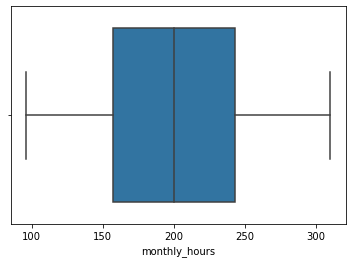

In [64]:
sns.boxplot(data=df_nodupes, x='monthly_hours')

In [30]:
from scipy.stats import zscore

In [36]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

df_outliers = df_nodupes[np.abs(zscore(df_nodupes['tenure'])) > 3]
df_outliers.head()

,satisfaction,last_eval,projects,monthly_hours,tenure,workplace_injury,left_company,promo_in_l5years,dept,salary
11007,0.49,0.67,2,190,8,0,0,0,marketing,medium
11008,0.92,0.99,3,176,8,0,0,0,sales,medium
11009,0.81,0.55,4,217,8,0,0,0,accounting,medium
11010,0.62,0.91,3,269,8,0,0,0,support,medium
11011,0.21,0.70,3,238,8,0,0,0,technical,medium


In [37]:
df_outliers.index

Int64Index([11007, 11008, 11009, 11010, 11011, 11078, 11079, 11080, 11081,
            11082,
            ...
            11976, 11981, 11982, 11983, 11993, 11994, 11995, 11996, 11997,
            11998],
           dtype='int64', length=188)

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

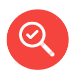
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

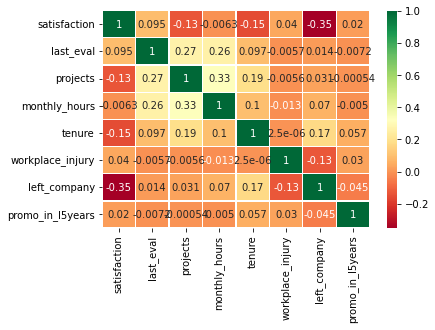

In [50]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.heatmap(df_nodupes.corr(), cmap ='RdYlGn', linewidths = 0.30, annot = True)

[Text(0, 0, 'sales'),
 Text(0, 0, 'accounting'),
 Text(0, 0, 'hr'),
 Text(0, 0, 'technical'),
 Text(0, 0, 'support'),
 Text(0, 0, 'management'),
 Text(0, 0, 'IT'),
 Text(0, 0, 'product_mng'),
 Text(0, 0, 'marketing'),
 Text(0, 0, 'RandD')]

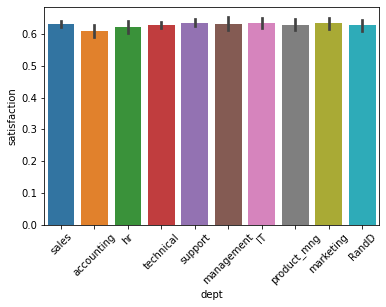

In [42]:
# Create a plot as needed
### YOUR CODE HERE ###
my_plot = sns.barplot(data=df_nodupes, x='dept', y='satisfaction')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

In [44]:
df_nodupes[['salary','satisfaction']].groupby('salary').mean()

,satisfaction
salary,
high,0.643343
low,0.622655
medium,0.634723


[Text(0, 0, 'sales'),
 Text(0, 0, 'accounting'),
 Text(0, 0, 'hr'),
 Text(0, 0, 'technical'),
 Text(0, 0, 'support'),
 Text(0, 0, 'management'),
 Text(0, 0, 'IT'),
 Text(0, 0, 'product_mng'),
 Text(0, 0, 'marketing'),
 Text(0, 0, 'RandD')]

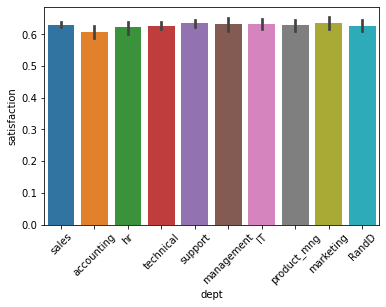

In [47]:
# Create a plot as needed
### YOUR CODE HERE ###
my_plot = sns.barplot(data=df_nodupes, x='dept', y='satisfaction')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

[Text(0, 0, 'sales'),
 Text(0, 0, 'accounting'),
 Text(0, 0, 'hr'),
 Text(0, 0, 'technical'),
 Text(0, 0, 'support'),
 Text(0, 0, 'management'),
 Text(0, 0, 'IT'),
 Text(0, 0, 'product_mng'),
 Text(0, 0, 'marketing'),
 Text(0, 0, 'RandD')]

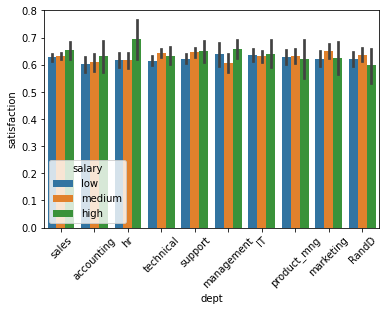

In [48]:
# Create a plot as needed
### YOUR CODE HERE ###
my_plot = sns.barplot(data=df_nodupes, x='dept', y='satisfaction', hue='salary')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

Average satisfaction is ~0.6 and Average eval is ~0.7; let us turn these into categories

In [52]:
def sat_cat(x):
    if x > 0.6:
        return 1
    return 0

In [53]:
df_nodupes['satisfaction'] = df_nodupes['satisfaction'].apply(sat_cat)

In [54]:
def eval_cat(x):
    if x > 0.7:
        return 1
    return 0

In [56]:
df_nodupes['last_eval'] = df_nodupes['last_eval'].apply(eval_cat)

In [62]:
df_nodupes[['satisfaction','last_eval']].groupby('last_eval').count()

,satisfaction
last_eval,
0,5747
1,6244


In [68]:
df_cleaned = df_nodupes.drop(df_outliers.index)
df_cleaned.head()

,satisfaction,last_eval,projects,monthly_hours,tenure,workplace_injury,left_company,promo_in_l5years,dept,salary
0,0,0,2,157,3,0,1,0,sales,low
1,1,1,5,262,6,0,1,0,sales,medium
2,0,1,7,272,4,0,1,0,sales,medium
3,1,1,5,223,5,0,1,0,sales,low
4,0,0,2,159,3,0,1,0,sales,low


In [70]:
df_cleaned.shape

(11803, 10)

In [72]:
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)
df_cleaned.head()

,satisfaction,last_eval,projects,monthly_hours,tenure,workplace_injury,left_company,promo_in_l5years,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
0,0,0,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,1,1,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0,1,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,1,1,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [73]:
df_cleaned.shape

(11803, 19)

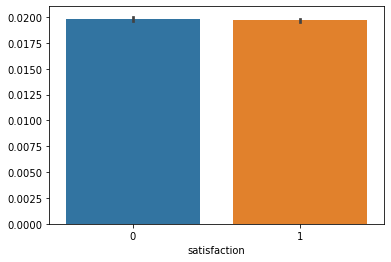

In [78]:
sns.barplot(df_cleaned['satisfaction'], (df_cleaned['projects']/df_cleaned['monthly_hours']))

In [75]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaled_features = df_cleaned.copy()

col_names = ['projects', 'monthly_hours', 'tenure']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
scaled_features.head()

,satisfaction,last_eval,projects,monthly_hours,tenure,workplace_injury,left_company,promo_in_l5years,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
0,0,0,-1.547257,-0.893247,-0.244815,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,1,1,1.025619,1.261349,2.446482,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0,1,2.740870,1.466548,0.652284,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,1,1,1.025619,0.461071,1.549383,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,-1.547257,-0.852207,-0.244815,0,1,0,0,0,0,0,0,0,1,0,0,1,0


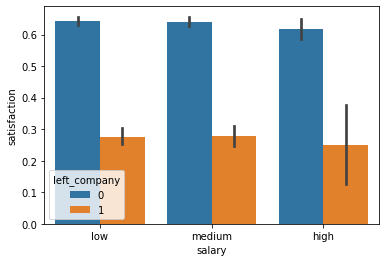

In [81]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.barplot(data=df_nodupes, y='satisfaction', x='salary', hue='left_company')

[Text(0, 0, 'sales'),
 Text(0, 0, 'accounting'),
 Text(0, 0, 'hr'),
 Text(0, 0, 'technical'),
 Text(0, 0, 'support'),
 Text(0, 0, 'management'),
 Text(0, 0, 'IT'),
 Text(0, 0, 'product_mng'),
 Text(0, 0, 'marketing'),
 Text(0, 0, 'RandD')]

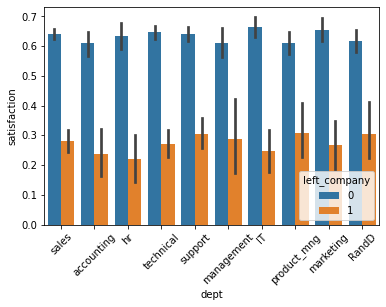

In [82]:
# Create a plot as needed
### YOUR CODE HERE ###
my_plot = sns.barplot(data=df_nodupes, x='dept', y='satisfaction', hue='left_company')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

In [83]:
df_stattest = df_nodupes.drop(df_outliers.index)
df_stattest

,satisfaction,last_eval,projects,monthly_hours,tenure,workplace_injury,left_company,promo_in_l5years,dept,salary
0,0,0,2,157,3,0,1,0,sales,low
1,1,1,5,262,6,0,1,0,sales,medium
2,0,1,7,272,4,0,1,0,sales,medium
3,1,1,5,223,5,0,1,0,sales,low
4,0,0,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11989,1,1,3,255,7,0,0,0,product_mng,low
11990,0,0,4,212,7,0,0,0,product_mng,medium
11991,0,0,2,235,7,0,0,0,IT,medium
11992,1,1,3,237,3,1,0,0,IT,medium


In [84]:
contingency_table = pd.crosstab(df_stattest['satisfaction'], df_stattest['left_company'])

In [85]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [86]:
if p_value < 0.05:
    print("The two columns are associated.")
else:
    print("The two columns are independent.")

The two columns are associated.


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


### Insights

We can conclude that satisfaction is statstically signifcant in playing a part in whether an employee leaves or not

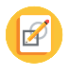
# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Binary logistic regression

### Identify the types of models most appropriate for this task.

LogisticRegression, XGBClassifier

### Modeling

Add as many cells as you need to conduct the modeling process.

In [88]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


In [89]:
y = scaled_features['satisfaction']

X = scaled_features.copy()
X = X.drop(['satisfaction','left_company'], axis=1) # since left_company is associated

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [95]:
lr = LogisticRegression(random_state=0)

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = [None, 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
cv_params = dict(solver=solvers,penalty=penalty,C=c_values)

In [91]:
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [92]:
lr_gscv = GridSearchCV(lr, cv_params, cv=5, scoring=scoring, refit='f1', n_jobs = -1)

In [96]:
%%time
lr_gscv.fit(X_train, y_train)

CPU times: user 309 ms, sys: 51.2 ms, total: 360 ms
Wall time: 3.12 s


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': [None, 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring={'f1', 'recall', 'precision', 'accuracy'}, verbose=0)

In [97]:
lr_gscv.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [98]:
lr_gscv.best_score_

0.7378509761722178

In [99]:
lr_gscv.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
def make_results(model_name:str, model_object, metric:str):
  '''
  Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy
  
  Returns a pandas df with the F1, recall, precision, and accuracy scores
  for the model with the best mean 'metric' score across all validation folds.  
  '''

  # Create dictionary that maps input metric to actual metric name in GridSearchCV
  metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

  # Get all the results from the CV and put them in a df
  cv_results = pd.DataFrame(model_object.cv_results_)

  # Isolate the row of the df with the max(metric) score
  best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

  # Extract Accuracy, precision, recall, and f1 score from that row
  f1 = best_estimator_results.mean_test_f1
  recall = best_estimator_results.mean_test_recall
  precision = best_estimator_results.mean_test_precision
  accuracy = best_estimator_results.mean_test_accuracy
  
  # Create table of results
  table = pd.DataFrame()
  table = table.append({'Model': model_name,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        },
                        ignore_index=True
                       )
  
  return table

In [101]:
make_results('Logistic Regression CV', lr_gscv, 'f1')

,Model,Precision,Recall,F1,Accuracy
0,Logistic Regression CV,0.636473,0.877861,0.737851,0.639403


In [104]:
y_pred = lr_gscv.best_estimator_.predict(X_test)

In [105]:
def get_test_scores(model_name:str, preds, y_test_data):
  '''
  Generate a table of test scores.

  In: 
    model_name (string): Your choice
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

  Out: 
    table: A pandas df of precision, recall, f1, and accuracy scores for your model
  '''

  #==> ENTER YOUR CODE HERE
  table = pd.DataFrame()
  table = table.append({'Model': model_name,
                        'F1':  f1_score(y_test_data, preds),
                        'Recall': recall_score(y_test_data, preds),
                        'Precision': precision_score(y_test_data, preds),
                        'Accuracy': accuracy_score(y_test_data, preds)
                      },
                        ignore_index=True
                    )
  
  return table

In [106]:
lr_gscv_test_scores = get_test_scores('Logistic Reg CV', y_pred, y_test)
lr_gscv_test_scores

,Model,F1,Recall,Precision,Accuracy
0,Logistic Reg CV,0.735265,0.860819,0.641674,0.6408


In [102]:
from sklearn.metrics import roc_curve, roc_auc_score

In [108]:
y_prob = lr_gscv.predict_proba(X_test)[:, 1]

pr, tpr, thresholds = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)
auc

0.5953400153620689

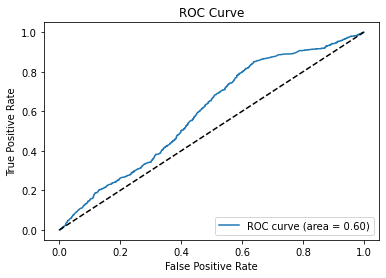

In [110]:
plt.plot(pr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [111]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic', random_state=0)

In [112]:
cv_params = {'max_depth': [5, 10, 15],
              'min_child_weight': [5, 10],
              'learning_rate': [0.1, 0.05],
              'n_estimators': [50, 100],
              }

In [113]:
xgb_cv1 = GridSearchCV(xgb, cv_params, cv=5, scoring=scoring, refit='f1', n_jobs = -1)

In [114]:
%%time
xgb_cv1.fit(X_train, y_train)

CPU times: user 1.11 s, sys: 60.9 ms, total: 1.17 s
Wall time: 58.3 s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated

In [115]:
make_results('XGBC CV', xgb_cv1, 'f1')

,Model,Precision,Recall,F1,Accuracy
0,XGBC CV,0.696468,0.926131,0.795022,0.723905


In [116]:
y_pred = xgb_cv1.best_estimator_.predict(X_test)

In [117]:
xgb_cv_test_scores = get_test_scores('XGBC CV', y_pred, y_test)
xgb_cv_test_scores

,Model,F1,Recall,Precision,Accuracy
0,XGBC CV,0.787453,0.917544,0.68967,0.712979


In [118]:
y_prob = xgb_cv1.predict_proba(X_test)[:, 1]

pr, tpr, thresholds = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)
auc

0.7310306723025668

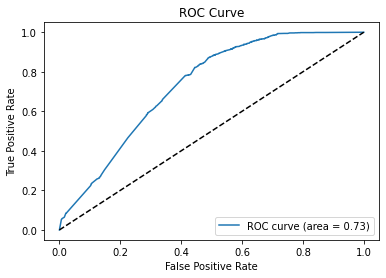

In [119]:
plt.plot(pr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

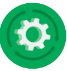
# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- What business recommendations do you propose based on the models built?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



We have a reasonable F1 score, so we are able mostly predict if the employee is satisfied or not

We could make this model better if we have access to manager reviews - a common statistic for quitting employees is bad relations with their managers

We could have tried to individually scour departments or salary ranges however our EDA did reveal that they were similar satisfaction levels so it would be unlikely we obtained more info

For ethical considerations we may weigh either precision or recall higher depending on our focus on either HR or their employees

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

With the given model we are able to predict roughly 4 out 5 employees satisfaction accurately

We can also look into a confusion matrix to see how our TP, FP, TN, FN rates measure up

We can also look into the best features to see what are the driving indicators for employee satisfaction

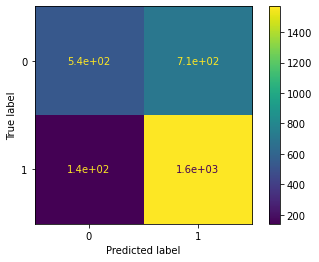

In [120]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv1.classes_)
disp.plot()

In [121]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

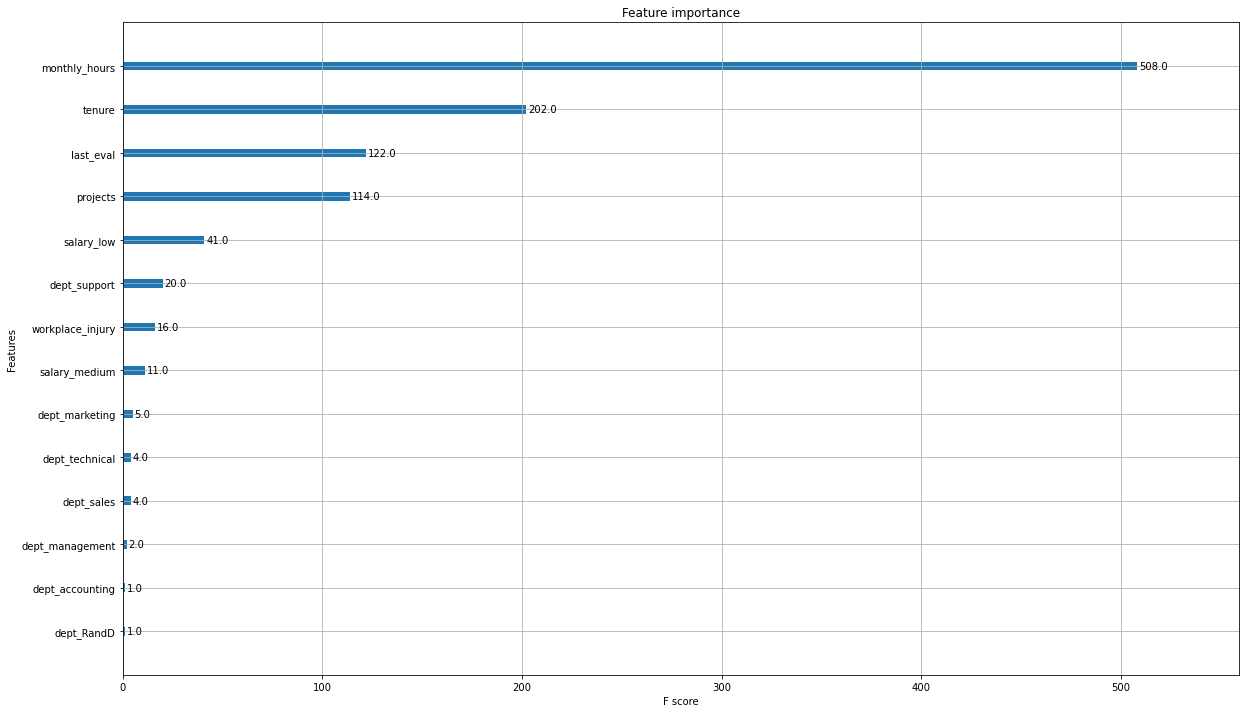

In [122]:
fig, ax = plt.subplots(figsize=(20, 12))
plot_importance(xgb_cv1.best_estimator_, ax=ax)

### Conclusion, Recommendations, Next Steps

Thus we note that our model struggles to correctly classify unsatisfied employees but is good with  correctly classifying satisfied employees. 

We can use this knowledge to leverage our model to help retain satisfied employees better.

The top 5 features noted were monthly hours, tenure, last evaluation, projects and low salary - these can be noted as driving factors to classifying satisfaction